In [174]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [175]:
SIZE = 1000
distributions = {'Нормальное': stats.norm.rvs(size=SIZE),
                 'Экспоненциальное': stats.expon.rvs(size=SIZE),
                 'Равномерное': stats.uniform.rvs(size=1000),
                 'Коши': stats.cauchy.rvs(size=1000)}


# Задание 1

In [176]:
columns = ['Мин.значение', 'Макс.значение', 'Размах', 'Мат.ожидание', 'Дисперсия', 'Стандартное отклонение',
           '0.25 квантиль', 'Медиана', '0.75 квантиль', 'Коэффициент ассиметрии', 'Эксцесс']
distributions_df = pd.DataFrame(columns=columns)
distributions_data = {}

for key, array in distributions.items():
    distributions_data[key] = [min(array), max(array), max(array) - min(array), array.mean(), array.var(), array.std(),
                               np.quantile(array, 0.25), np.quantile(array, 0.5), np.quantile(array, 0.75), stats.skew(array), stats.kurtosis(array)]
    
distributions_df = pd.DataFrame.from_dict(distributions_data, orient='index', columns=columns)
distributions_df

    

,Мин.значение,Макс.значение,Размах,Мат.ожидание,Дисперсия,Стандартное отклонение,0.25 квантиль,Медиана,0.75 квантиль,Коэффициент ассиметрии,Эксцесс
Нормальное,-3.253331,3.074939,6.328270,0.010665,1.083700,1.041009,-0.686452,-0.018794,0.674037,0.104715,-0.131125
Экспоненциальное,0.000036,9.823673,9.823636,0.996165,1.145097,1.070092,0.268941,0.652049,1.335527,2.313646,8.411531
Равномерное,0.001901,0.999949,0.998049,0.504035,0.079082,0.281216,0.256968,0.504301,0.739027,-0.012250,-1.129853
Коши,-349.881166,1069.146520,1419.027686,0.398091,1536.213977,39.194566,-1.000707,0.044696,0.920461,19.099661,561.307581


In [177]:
distributions_df.to_csv('task_1.csv')


# Задание 2

In [178]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [179]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [180]:
titanic_df.set_index('PassengerId', inplace=True)
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [181]:
titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [182]:
titanic_df['Sex'] = np.where(titanic_df['Sex'] == 'male', 0, 1)
titanic_df['Sex']

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    1
890    0
891    0
Name: Sex, Length: 891, dtype: int32

In [183]:
titanic_df.sort_values(by=['Sex', 'Age'], ascending=[True, False], inplace=True)
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",0,80.0,0,0,27042,30.0000,A23,S
852,0,3,"Svensson, Mr. Johan",0,74.0,0,0,347060,7.7750,NaN,S
97,0,1,"Goldschmidt, Mr. George B",0,71.0,0,0,PC 17754,34.6542,A5,C
494,0,1,"Artagaveytia, Mr. Ramon",0,71.0,0,0,PC 17609,49.5042,NaN,C
117,0,3,"Connors, Mr. Patrick",0,70.5,0,0,370369,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
728,1,3,"Mannion, Miss. Margareth",1,NaN,0,0,36866,7.7375,NaN,Q
793,0,3,"Sage, Miss. Stella Anna",1,NaN,8,2,CA. 2343,69.5500,NaN,S
850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",1,NaN,1,0,17453,89.1042,C92,C


In [184]:
titanic_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",0,80.0,0,0,27042,30.0000,A23,S
852,0,3,"Svensson, Mr. Johan",0,74.0,0,0,347060,7.7750,NaN,S
97,0,1,"Goldschmidt, Mr. George B",0,71.0,0,0,PC 17754,34.6542,A5,C
494,0,1,"Artagaveytia, Mr. Ramon",0,71.0,0,0,PC 17609,49.5042,NaN,C
117,0,3,"Connors, Mr. Patrick",0,70.5,0,0,370369,7.7500,NaN,Q
673,0,2,"Mitchell, Mr. Henry Michael",0,70.0,0,0,C.A. 24580,10.5000,NaN,S
746,0,1,"Crosby, Capt. Edward Gifford",0,70.0,1,1,WE/P 5735,71.0000,B22,S
34,0,2,"Wheadon, Mr. Edward H",0,66.0,0,0,C.A. 24579,10.5000,NaN,S
55,0,1,"Ostby, Mr. Engelhart Cornelius",0,65.0,0,1,113509,61.9792,B30,C


In [185]:
titanic_df.tail(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
613,1,3,"Murphy, Miss. Margaret Jane",1,NaN,1,0,367230,15.5000,NaN,Q
654,1,3,"O'Leary, Miss. Hanora ""Norah""",1,NaN,0,0,330919,7.8292,NaN,Q
670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",1,NaN,1,0,19996,52.0000,C126,S
681,0,3,"Peters, Miss. Katie",1,NaN,0,0,330935,8.1375,NaN,Q
698,1,3,"Mullens, Miss. Katherine ""Katie""",1,NaN,0,0,35852,7.7333,NaN,Q
728,1,3,"Mannion, Miss. Margareth",1,NaN,0,0,36866,7.7375,NaN,Q
793,0,3,"Sage, Miss. Stella Anna",1,NaN,8,2,CA. 2343,69.5500,NaN,S
850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",1,NaN,1,0,17453,89.1042,C92,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,NaN,8,2,CA. 2343,69.5500,NaN,S


In [186]:
print("Количество пустых значений в каждом из столбцов")
print(titanic_df.isna().sum())
print(f"Количество строк в таблице до удаления пустых значений - {len(titanic_df)}")
titanic_df.dropna(inplace=True)
print(f"Количество строк в таблице после удаления пустых значений - {len(titanic_df)}")

Количество пустых значений в каждом из столбцов
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
Количество строк в таблице до удаления пустых значений - 891
Количество строк в таблице после удаления пустых значений - 183


In [187]:
titanic_df.to_excel('prepared_task_2.xlsx')

# Задание 3

In [188]:
titanic_df = pd.read_excel('prepared_task_2.xlsx')
titanic_df.set_index("PassengerId", inplace=True)
titanic_df


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",0,80.0,0,0,27042,30.0000,A23,S
97,0,1,"Goldschmidt, Mr. George B",0,71.0,0,0,PC 17754,34.6542,A5,C
746,0,1,"Crosby, Capt. Edward Gifford",0,70.0,1,1,WE/P 5735,71.0000,B22,S
55,0,1,"Ostby, Mr. Engelhart Cornelius",0,65.0,0,1,113509,61.9792,B30,C
457,0,1,"Millet, Mr. Francis Davis",0,65.0,0,0,13509,26.5500,E38,S
...,...,...,...,...,...,...,...,...,...,...,...
436,1,1,"Carter, Miss. Lucile Polk",1,14.0,1,2,113760,120.0000,B96 B98,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S
619,1,2,"Becker, Miss. Marion Louise",1,4.0,2,1,230136,39.0000,F4,S


In [207]:
print(titanic_df['Sex'].value_counts())

Sex
0    95
1    88
Name: count, dtype: int64


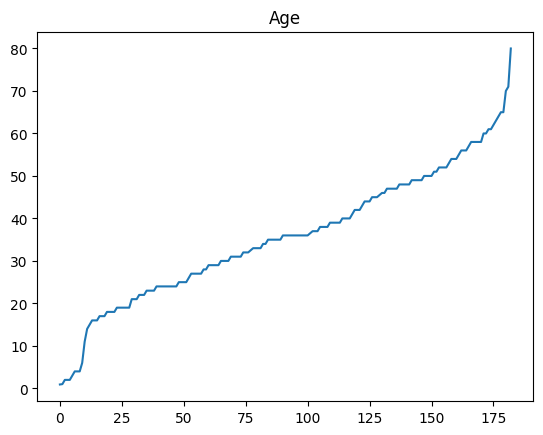

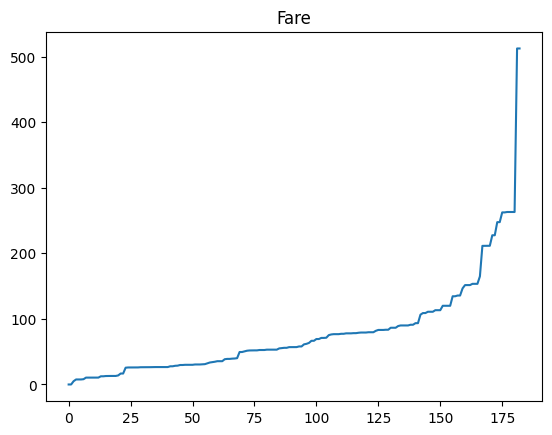

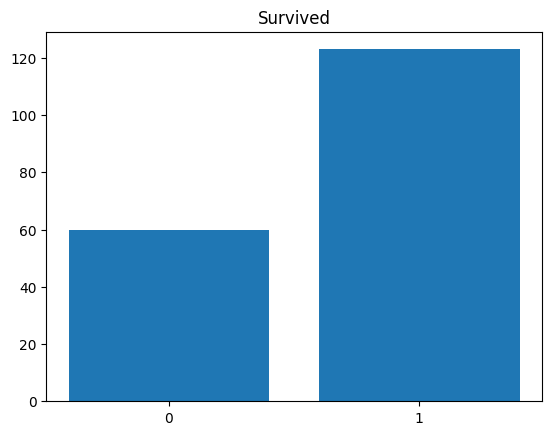

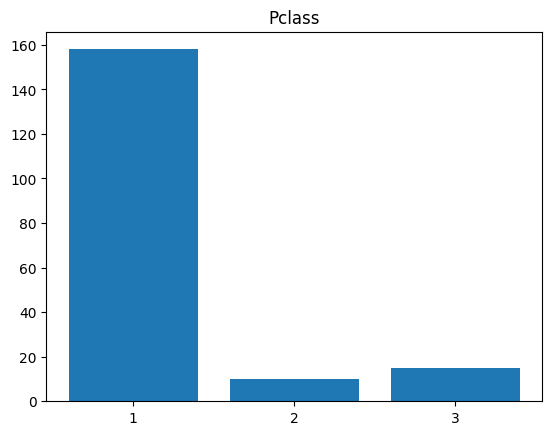

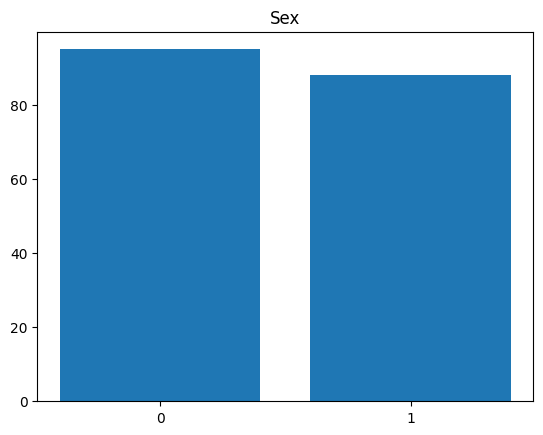

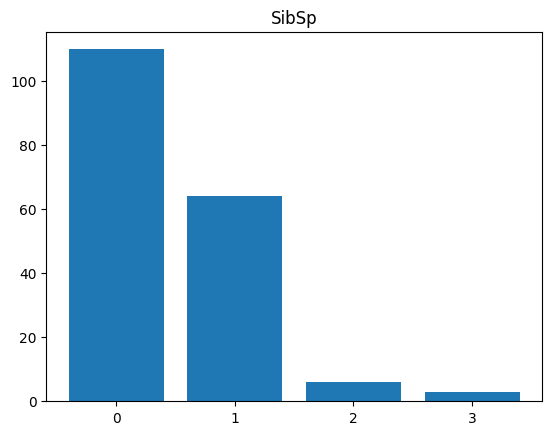

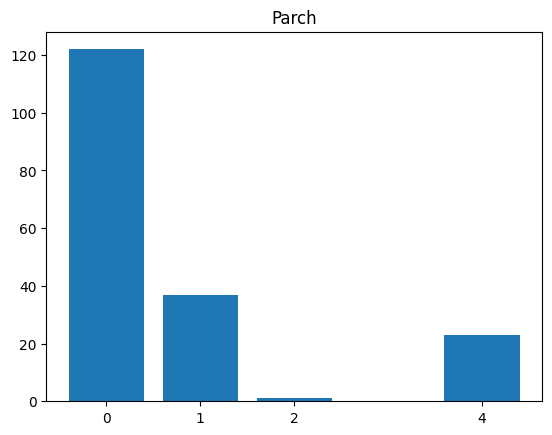

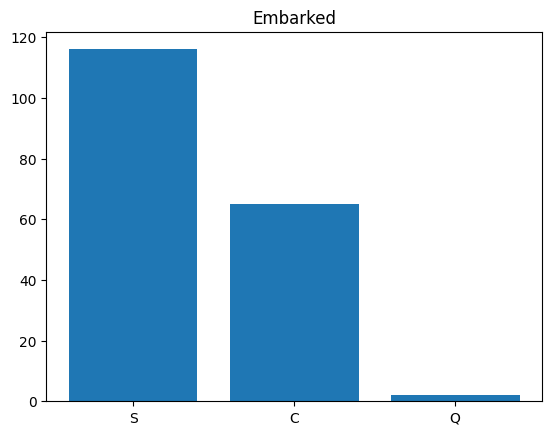

In [220]:
for column in ['Age', 'Fare']:
    plt.plot(sorted(titanic_df[column]))
    plt.title(column)
    plt.show()
    
for column in ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    plt.bar(titanic_df[column].unique(), titanic_df[column].value_counts(), tick_label=titanic_df[column].astype("category").unique())
    plt.title(column)
    plt.show()

In [221]:
print(f"Количество выживших пассажиров - {titanic_df['Survived'].sum()}")

Количество выживших пассажиров - 123


In [228]:
titanic_df[['Age', 'SibSp', 'Embarked', "Parch", 'Survived']].groupby("Embarked").mean()

,Age,SibSp,Parch,Survived
Embarked,,,,
C,37.461538,0.415385,0.400000,0.738462
Q,38.500000,1.500000,0.000000,0.500000
S,34.624310,0.474138,0.525862,0.637931
